In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


In [44]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# TASK 1 

## Univariate Analysis

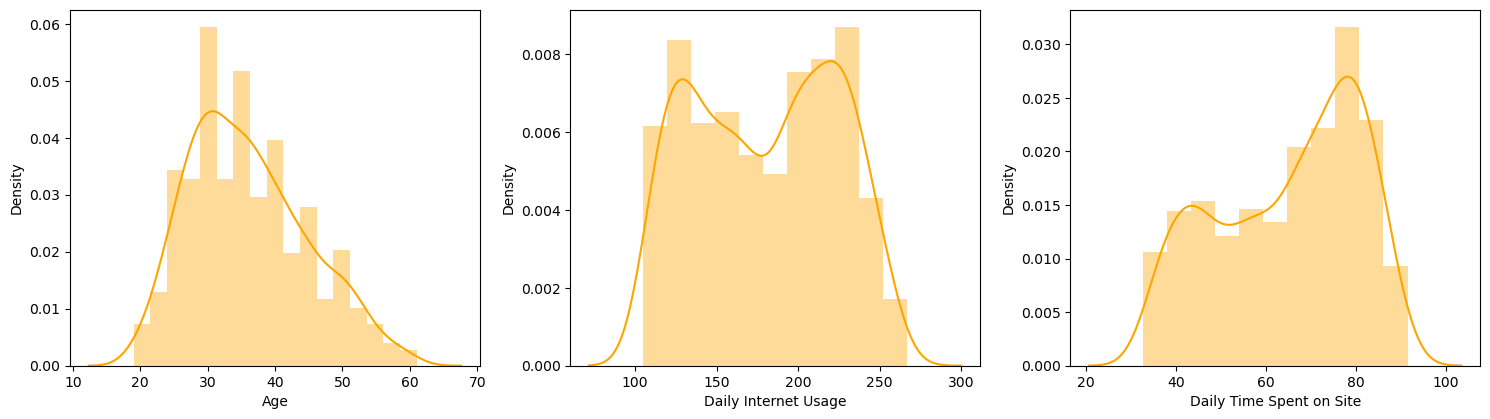

In [45]:
#Univariate Analysis Data Numerik
selected_features = ['Age','Daily Internet Usage','Daily Time Spent on Site']

plt.figure(figsize=(15,8))
for i in range(0,len(selected_features)):
    plt.subplot(2,3,i+1)
    sns.distplot(x=df[selected_features[i]], color = 'orange')
    plt.xlabel(selected_features[i])
    plt.tight_layout()

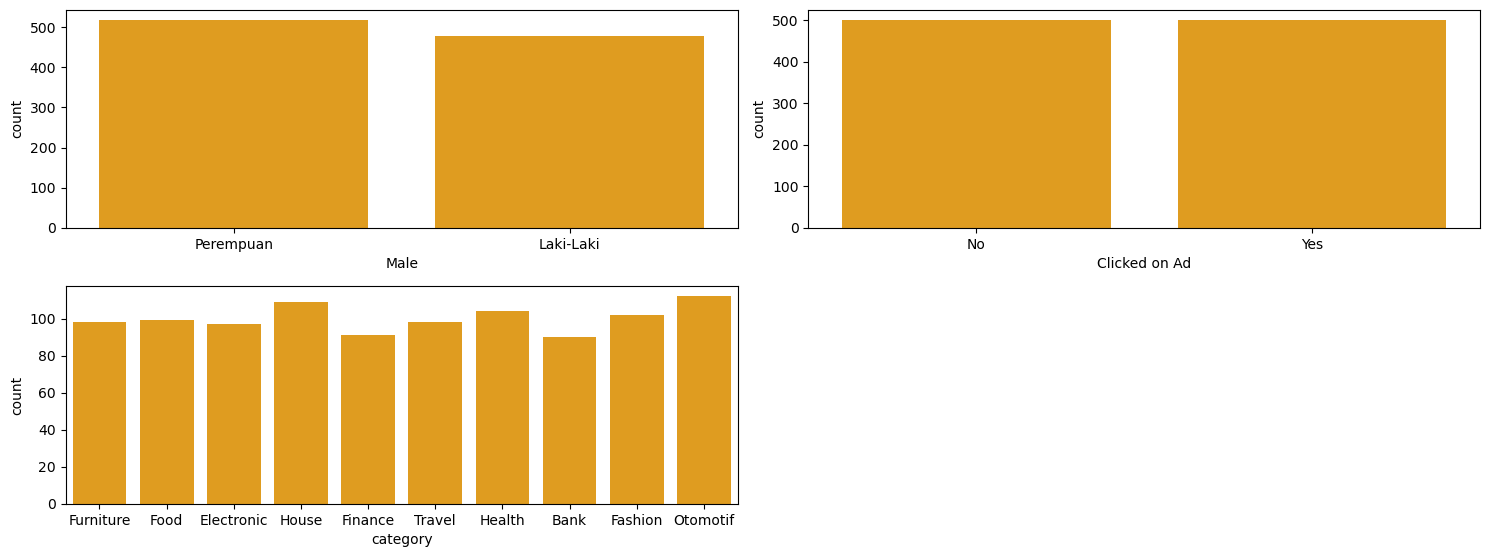

In [46]:
#Univariate Analysis Data Kategorikal
categorical_features = ['Male','Clicked on Ad','category']

plt.figure(figsize=(15,8))
for i in range(0,len(categorical_features)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[categorical_features[i]], color = 'orange')
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

## Bivariate Analysis

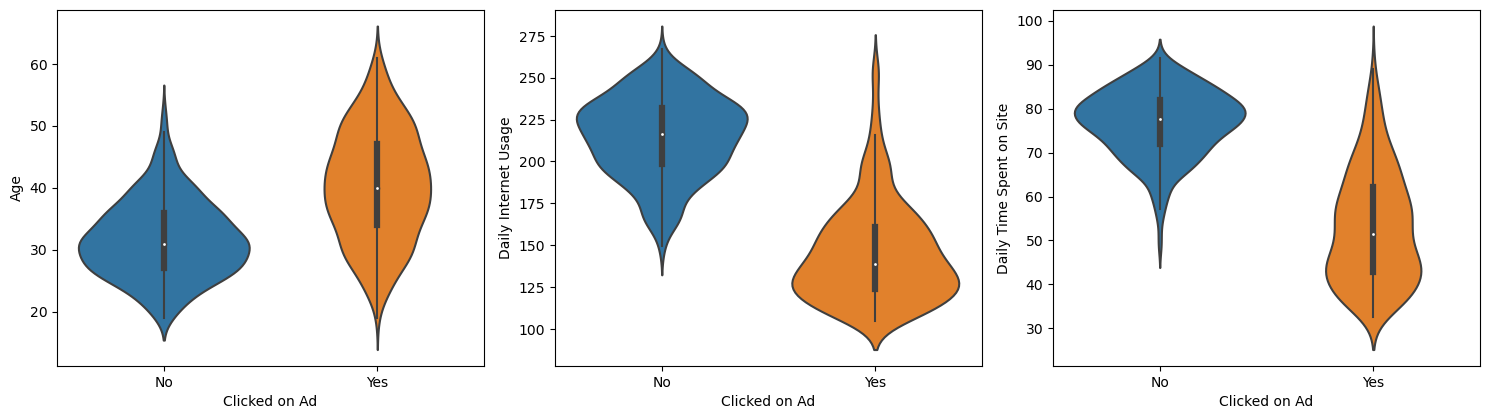

In [47]:
plt.figure(figsize=(15,8))

selected_features = ['Age','Daily Internet Usage','Daily Time Spent on Site']

for i in range(0,len(selected_features)):
    plt.subplot(2,3,i+1)
    sns.violinplot(x='Clicked on Ad', y=df[selected_features[i]], data=df)
    plt.tight_layout()

## Multivariate Analysis

<AxesSubplot:>

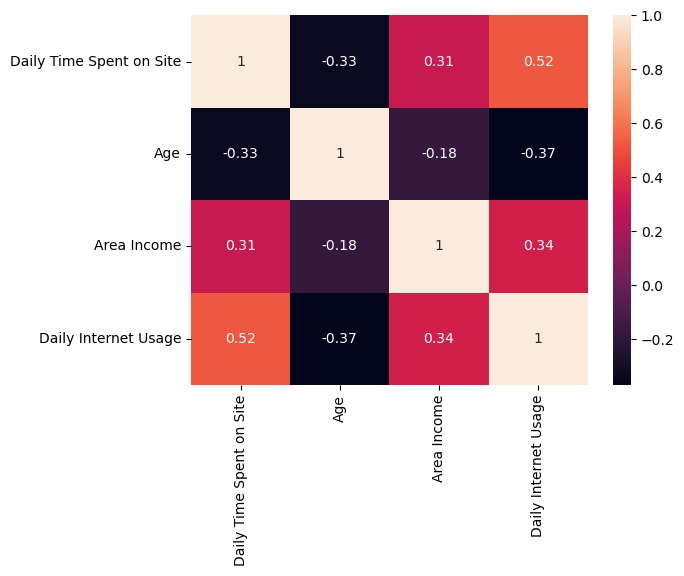

In [48]:
sns.heatmap(df.corr(), annot=True)

# TASK 2

## Handle missing value dan duplicated value

In [49]:
print("Sum of Missing value:")
print(df.isnull().sum())
print("           ")
print("Sum of Duplicated value:")
print(df.duplicated().sum())

Sum of Missing value:
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64
           
Sum of Duplicated value:
0


### Cara handle missing value:
- Pada kolom 'Male': missing value dihilangkan karena jumlahnya terlalu sedikit
- Pada kolom 'Daily Time Spent on Site : diganti dengan nilai mean 
- Pada kolom 'Area Income' : diganti dengan nilai mean 
- Pada kolom 'Daily Internet Usage' : diganti dengan nilai mean

In [50]:
miss = ['Daily Internet Usage','Daily Time Spent on Site','Area Income']
for x in miss:
    df[x] = df[x].fillna(df[x].mean())

df.dropna(subset='Male', inplace=True)

print("Sum of Missing value:")
df.isnull().sum()

Sum of Missing value:


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## Feature Encoding

In [51]:
#Feature encoding kolom 'Male'
encode_male = {
    'Perempuan':0,
    'Laki-Laki':1
    }
df['Male'] = df['Male'].map(encode_male) 

#Feature encoding kolom 'Clicked on Ad'
encode_click = {
    'No':0,
    'Yes':1
    }
df['Clicked on Ad'] = df['Clicked on Ad'].map(encode_click)

## One-hot Encoding

In [52]:
df = pd.get_dummies(df, prefix=['cat'], columns=['category'])
df = pd.get_dummies(df, prefix=['city'], columns=['city'])
df = pd.get_dummies(df, prefix=['prov'], columns=['province'])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,cat_Bank,cat_Electronic,cat_Fashion,...,prov_Kalimantan Barat,prov_Kalimantan Selatan,prov_Kalimantan Timur,prov_Kepulauan Riau,prov_Lampung,prov_Riau,prov_Sulawesi Selatan,prov_Sumatra Barat,prov_Sumatra Selatan,prov_Sumatra Utara
0,68.95,35,432837300.0,256.09,0,3/27/2016 0:53,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,479092950.0,193.77,1,4/4/2016 1:39,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,3/13/2016 20:35,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,1/10/2016 2:31,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,68.37,35,517229930.0,225.58,0,6/3/2016 3:36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Ekstraksi kolom Timestamp

In [53]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Year_clicked'] = df['Timestamp'].apply(lambda x: x.year)
df['Month_clicked'] = df['Timestamp'].apply(lambda x: x.month)
df['Week_clicked'] = df['Timestamp'].apply(lambda x: x.week)
df['Day_clicked'] = df['Timestamp'].apply(lambda x: x.day)

df.drop('Timestamp', axis=1, inplace=True)

## Split feature dan target

In [54]:
#kolom fitur
X = df.drop('Clicked on Ad', axis=1)

#kolom target
y = df['Clicked on Ad']

# TASK 3

In [55]:
#Fungsi Evaluasi Model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("")
    print('Evaluation Metrics:')
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print('Accuracy (Train Set): %.2f' %accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print('Precision (Train Set: %.2f' %precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    #model_in = model(hyper1=1, hyper2=2)
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(7, 5))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

Confusion Matrix: 
[[88 23]
 [ 9 80]]

Evaluation Metrics:
Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.94
Precision (Test Set): 0.78
Precision (Train Set: 0.94
Recall (Test Set): 0.90
Recall (Train Set): 0.93
F1-Score (Test Set): 0.83
F1-Score (Train Set): 0.94
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.99
recall (crossval train): 0.9018558897243107
recall (crossval test): 0.7615353535353535


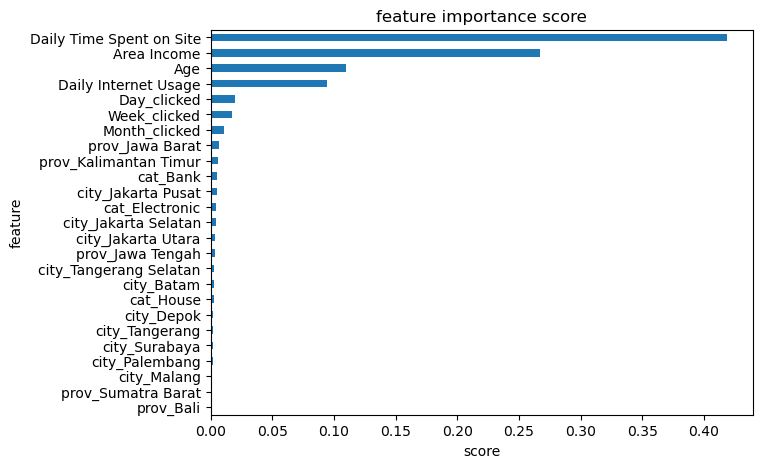

In [56]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#MODELLING TANPA NORMALISASI 
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np
import warnings
warnings.filterwarnings('ignore')

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] 
min_samples_split = [2, 5, 10, 100] 
min_samples_leaf = [1, 2, 4, 10, 20, 100]
max_features = ['auto', 'sqrt'] 
criterion = ['gini','entropy']
splitter = ['best','random']


hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model

dt = DecisionTreeClassifier(random_state=0)
gs = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall')
gs.fit(X_train, y_train)
eval_classification(gs)

show_feature_importance(gs.best_estimator_)

Confusion Matrix: 
[[90 21]
 [ 6 83]]

Evaluation Metrics:
Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.94
Precision (Test Set): 0.80
Precision (Train Set: 0.94
Recall (Test Set): 0.93
Recall (Train Set): 0.94
F1-Score (Test Set): 0.86
F1-Score (Train Set): 0.94
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.99
recall (crossval train): 0.8612443609022555
recall (crossval test): 0.7875757575757575


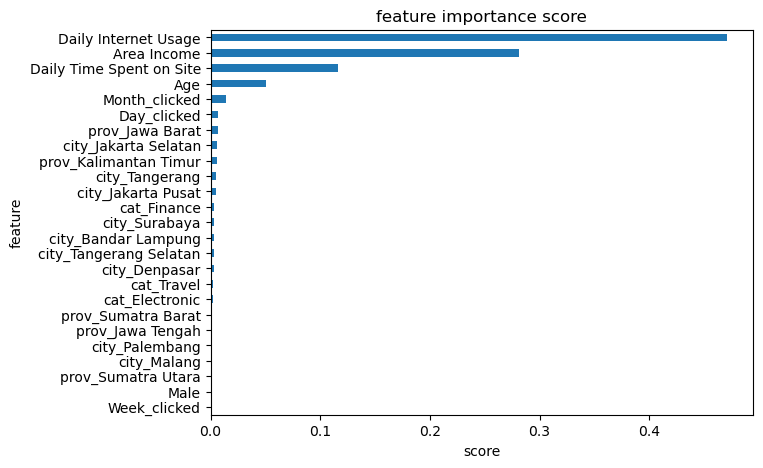

In [57]:
#PROSES NORMALISASI
from sklearn.preprocessing import MinMaxScaler
minmax = X.columns.to_list()
mmscaler = MinMaxScaler()
#fit train data
mmscaler.fit(X[minmax])
X[minmax] = mmscaler.transform(X[minmax])
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#MODELLING DENGAN NORMALISASI 


max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] 
min_samples_split = [2, 5, 10, 100] 
min_samples_leaf = [1, 2, 4, 10, 20, 100]
max_features = ['auto', 'sqrt'] 
criterion = ['gini','entropy']
splitter = ['best','random']


hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=0)
gs = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall')
gs.fit(X_train, y_train)
eval_classification(gs)

show_feature_importance(gs.best_estimator_)

# TASK 4

## EDA dan Feature Importance

,Importance Score
Daily Internet Usage,0.470948
Area Income,0.281165
Daily Time Spent on Site,0.116519
Age,0.050436
Month_clicked,0.014098


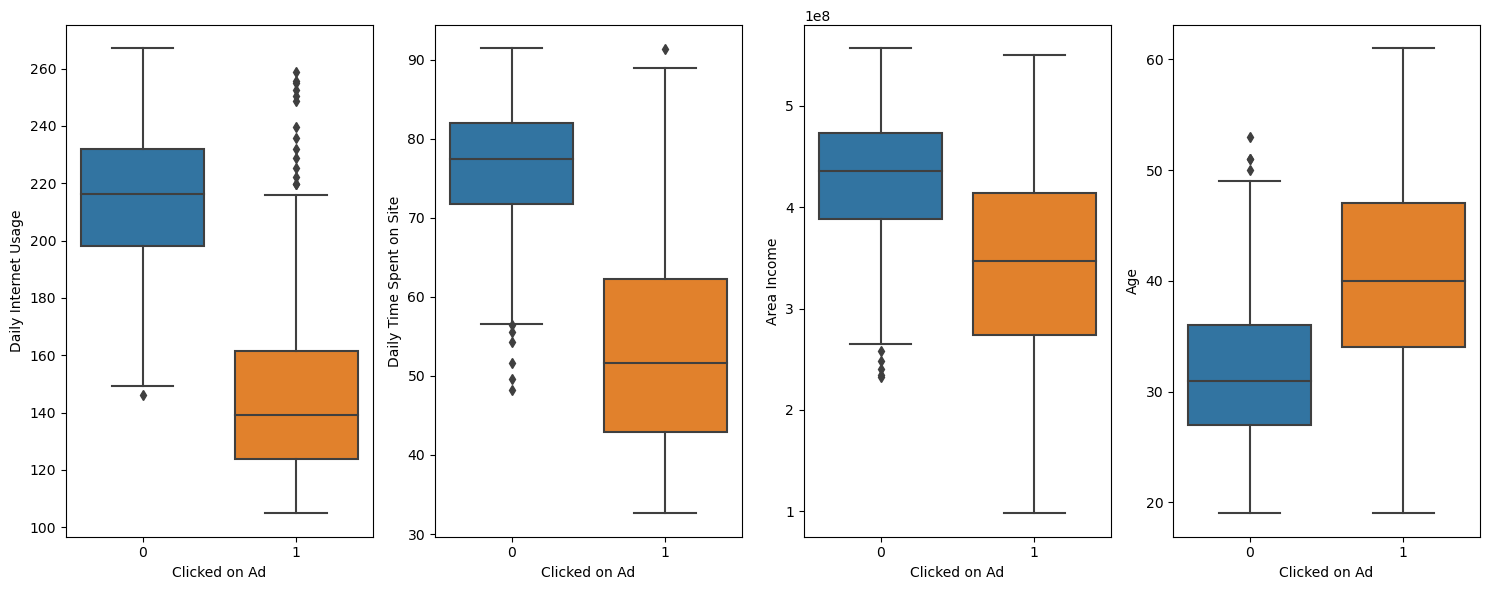

In [58]:
feat_importance = pd.DataFrame(pd.Series(gs.best_estimator_.feature_importances_, index=X.columns),columns=['Importance Score'])
display(feat_importance.sort_values(ascending=False, by='Importance Score').head())

plt.figure(figsize=(15,6))

selected_features = ['Daily Internet Usage','Daily Time Spent on Site','Area Income','Age']

for i in range(0,len(selected_features)):
    plt.subplot(1,4,i+1)
    sns.boxplot(x='Clicked on Ad', y=df[selected_features[i]], data=df)
    plt.tight_layout()

## Business Simulation

Jika diasumsikan cost untuk satu kali campaign adalah 45.000, dan revenue yang dihasilkan ketika customer klik campaign tersebut adalah 165.000, maka simulasi untung-rugi nya adalah sebagai berikut: 

In [63]:
#Tanpa Modelling
jumlah_campaign = df.shape[0]
jumlah_klik = df[df['Clicked on Ad']==1].shape[0]
revenue = jumlah_klik * 200000
cost = jumlah_campaign * 100000
profit = revenue - cost

#Dengan Modelling
y_pred = gs.best_estimator_.predict(X_test)
y_pred_train = gs.best_estimator_.predict(X_train)
false_positive = confusion_matrix(y_test, y_pred)[0][1]
true_positive = confusion_matrix(y_test, y_pred)[1][1]

jumlah_campaign_model = false_positive + true_positive
jumlah_klik_model = true_positive
revenue_model = jumlah_klik_model * 200000
cost_model = jumlah_campaign_model * 100000
profit_model = revenue_model - cost_model

list_no_model = [jumlah_campaign,jumlah_klik,revenue,cost,profit]
list_with_model = [jumlah_campaign_model,jumlah_klik_model,revenue_model,cost_model,profit_model]

summary_df = pd.DataFrame({
                        'Metriks':['Jumlah Campaign','Jumlah Klik','Revenue','Cost','Profit'],
                        'Tanpa Model':list_no_model,
                        'Dengan Modelling':list_with_model
                        })
summary_df

,Metriks,Tanpa Model,Dengan Modelling
0,Jumlah Campaign,997,104
1,Jumlah Klik,499,83
2,Revenue,99800000,16600000
3,Cost,99700000,10400000
4,Profit,100000,6200000
